# PJME Energy Consuption

## ToDo
- [x] Install Packages
- [x] Importing Packages
- [x] Download Dataset
- [x] Data Preparation
- [x] Feature Engineering
- [x] Training Model
- [x] Feature Importance
- [x] Evaluating Model

### Install Packages


In [1]:
!pip install opendatasets xgboost --quiet

### Import Packages

In [2]:
import numpy as np
import pandas as pd

import opendatasets as od

import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.metrics import mean_squared_error

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

%matplotlib inline

### Download Dataset

In [3]:
od.download('https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption')

100%|██████████| 11.4M/11.4M [00:00<00:00, 41.8MB/s]


### Data Preparation

In [4]:
df = pd.read_csv('/content/hourly-energy-consumption/PJME_hourly.csv', index_col = 'Datetime')
df.head(5)

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [5]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2002-12-31 01:00:00', '2002-12-31 02:00:00',
               '2002-12-31 03:00:00', '2002-12-31 04:00:00',
               '2002-12-31 05:00:00', '2002-12-31 06:00:00',
               '2002-12-31 07:00:00', '2002-12-31 08:00:00',
               '2002-12-31 09:00:00', '2002-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=145366, freq=None)

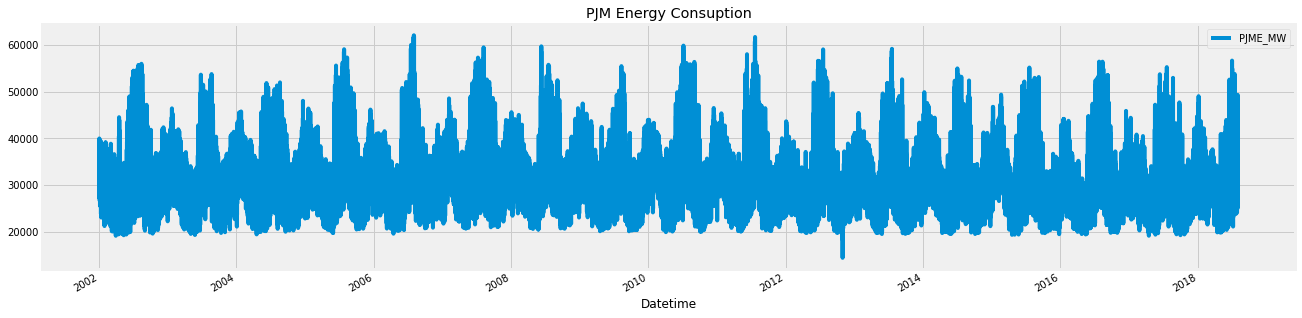

In [6]:
df.plot(figsize = (20, 5), title = 'PJM Energy Consuption');

In [7]:
df.index.year.value_counts()

2016    8784
2004    8782
2008    8782
2012    8782
2017    8760
2014    8760
2015    8760
2005    8758
2006    8758
2007    8758
2009    8758
2003    8758
2011    8758
2013    8758
2002    8757
2010    8757
2018    5136
Name: Datetime, dtype: int64

In [8]:
train_set = df.loc[df.index < '01-01-2015']
test_set = df.loc[df.index >= '01-01-2015']

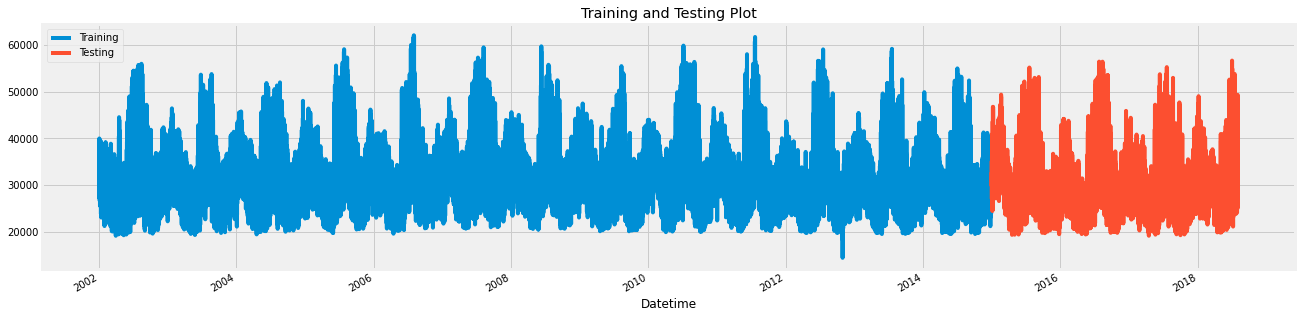

In [9]:
fig, ax = plt.subplots(figsize = (20, 5))
train_set.plot(ax = ax, label = 'Training Set')
test_set.plot(ax = ax, label = "Testing Set")
ax.legend(['Training', "Testing"])
plt.title("Training and Testing Plot")
plt.show()

### Feature Engineering

In [10]:
def splitDatetime(df):
    """
    Splitting Datetime and Creating a feature
    """

    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    return df

df = splitDatetime(df)

In [11]:
df.head(5)

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth
Datetime,,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365,31
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365,31
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365,31
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365,31
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365,31


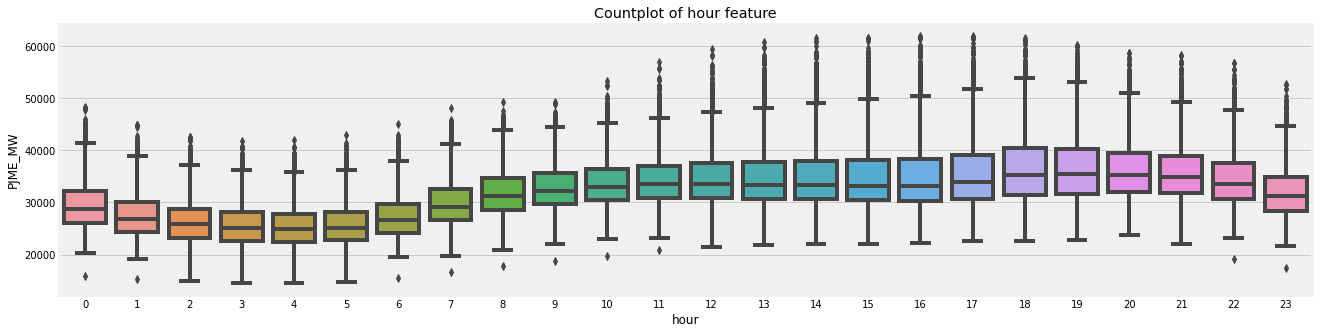

In [12]:
plt.figure(figsize = (20, 5))
sns.boxplot(
    data = df, 
    x = 'hour', 
    y = 'PJME_MW'
)
plt.title('Countplot of hour feature')
plt.show()

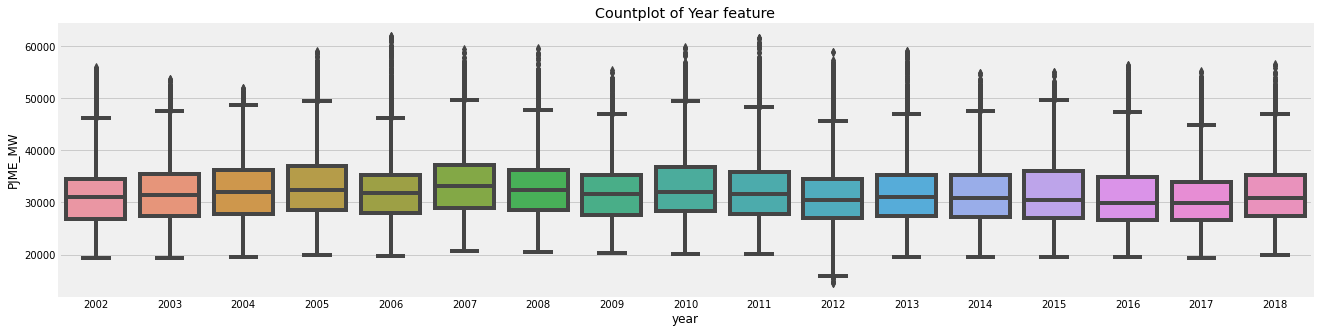

In [13]:
plt.figure(figsize = (20, 5))
sns.boxplot(
    data = df, 
    x = 'year', 
    y = 'PJME_MW'
)
plt.title('Countplot of Year feature')
plt.show()

### Training Model

In [14]:
train_set = splitDatetime(train_set)
test_set = splitDatetime(test_set)

In [15]:
features = df.columns.to_list()[1:]
target = 'PJME_MW'

In [16]:
X_train = train_set[features]
y_train = train_set[target]

X_test = test_set[features]
y_test = test_set[target]

In [17]:
reg = xgb.XGBRegressor(
    n_estimators = 1000,
    early_stopping_rounds = 50
)

reg.fit(
    X_train, y_train,
    eval_set = [(X_train, y_train), (X_test, y_test)],
    verbose = 100
)

[02:36:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:29710.4	validation_1-rmse:28762.5
[100]	validation_0-rmse:3031.55	validation_1-rmse:3741.92
[200]	validation_0-rmse:2834.83	validation_1-rmse:3768.81
[300]	validation_0-rmse:2722.12	validation_1-rmse:3855.92
[400]	validation_0-rmse:2644.33	validation_1-rmse:3884.31
[500]	validation_0-rmse:2577.09	validation_1-rmse:3948.27
[600]	validation_0-rmse:2533.09	validation_1-rmse:3971.4
[700]	validation_0-rmse:2499.06	validation_1-rmse:3980.7
[800]	validation_0-rmse:2471.31	validation_1-rmse:3992.85
[900]	validation_0-rmse:2438.71	validation_1-rmse:4018.56
[999]	validation_0-rmse:2408.34	validation_1-rmse:4039.16


XGBRegressor(early_stopping_rounds=50, n_estimators=1000)

### Feature Importance

In [19]:
reg.feature_importances_

array([0.37925464, 0.13252233, 0.04211862, 0.29553762, 0.02290082,
       0.11448465, 0.0131812 ], dtype=float32)

In [28]:
importantFeature = pd.DataFrame(data = reg.feature_importances_, index = features, columns = ['importance'])
importantFeature

,importance
hour,0.379255
dayofweek,0.132522
quarter,0.042119
month,0.295538
year,0.022901
dayofyear,0.114485
dayofmonth,0.013181


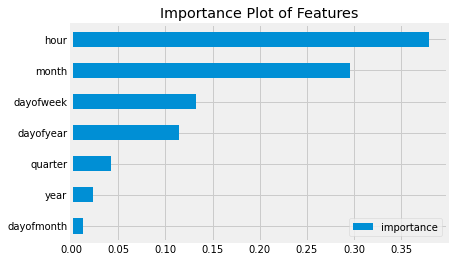

In [29]:
importantFeature.sort_values(by = 'importance').plot(kind = 'barh', title = 'Importance Plot of Features')
plt.show()

### Evaluating Model

In [33]:
testPreds = reg.predict(X_test)
np.sqrt(mean_squared_error(y_test, testPreds))

4039.1591670369007

In [37]:
error = np.abs(y_test - testPreds)
pd.DataFrame(data = error)

,PJME_MW
Datetime,
2015-01-01 00:00:00,1033.300781
2015-12-31 01:00:00,4591.437500
2015-12-31 02:00:00,4734.765625
2015-12-31 03:00:00,4727.652344
2015-12-31 04:00:00,5041.574219
...,...
2018-01-01 20:00:00,7636.371094
2018-01-01 21:00:00,7874.722656
2018-01-01 22:00:00,8135.839844
